In [239]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("/home/pintz/dev/analytics/gdp-by-state/data/processed/data.csv")
data

,STATE,SECTOR,1997,1998,1999,2000,2001,2002,2003,2004,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Alabama,"Agriculture, forestry, fishing and hunting",2.176800e+09,2.411300e+09,2.730500e+09,2.685600e+09,2.933300e+09,2.528700e+09,3.127700e+09,3.638300e+09,...,1.788800e+09,2.986400e+09,2.590700e+09,3.185300e+09,2.781600e+09,3.050100e+09,3.185100e+09,2.666700e+09,2.190300e+09,2.871000e+09
1,Alabama,"Mining, quarrying, and oil and gas extraction",3.492800e+09,3.959800e+09,3.606800e+09,3.248800e+09,3.581500e+09,3.294900e+09,3.422400e+09,3.520500e+09,...,2.906400e+09,2.774400e+09,2.408800e+09,2.309200e+09,2.229900e+09,2.920600e+09,2.739700e+09,2.500600e+09,2.373500e+09,2.196800e+09
2,Alabama,Utilities,4.150900e+09,4.024400e+09,4.709200e+09,4.834600e+09,4.232500e+09,4.309300e+09,4.299100e+09,4.551000e+09,...,5.711800e+09,5.524600e+09,5.254600e+09,5.337800e+09,5.771500e+09,5.555300e+09,5.439700e+09,5.581600e+09,5.668400e+09,5.321000e+09
3,Alabama,Construction,9.379400e+09,1.004760e+10,1.022370e+10,1.024180e+10,9.775800e+09,9.336200e+09,9.279200e+09,9.136000e+09,...,6.897600e+09,6.649300e+09,6.363200e+09,6.335000e+09,6.643800e+09,6.827800e+09,7.078700e+09,7.506000e+09,7.520500e+09,7.730300e+09
4,Alabama,Manufacturing,2.182400e+10,2.248370e+10,2.354690e+10,2.406180e+10,2.352440e+10,2.376890e+10,2.470240e+10,2.994730e+10,...,3.205870e+10,3.381410e+10,3.276980e+10,3.220950e+10,3.346970e+10,3.428260e+10,3.530480e+10,3.541420e+10,3.395390e+10,3.606240e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1015,Wyoming,Health care and social assistance,8.421000e+08,8.562000e+08,9.087000e+08,9.682000e+08,9.895000e+08,1.050000e+09,1.105900e+09,1.164700e+09,...,1.561600e+09,1.554900e+09,1.553700e+09,1.579900e+09,1.573400e+09,1.566400e+09,1.594400e+09,1.611800e+09,1.619000e+09,1.616200e+09
1016,Wyoming,"Arts, entertainment, and recreation",1.928000e+08,1.902000e+08,2.115000e+08,2.346000e+08,1.962000e+08,1.681000e+08,1.752000e+08,1.766000e+08,...,2.613000e+08,2.481000e+08,2.725000e+08,2.469000e+08,2.385000e+08,2.506000e+08,2.574000e+08,2.454000e+08,2.073000e+08,2.451000e+08
1017,Wyoming,Accommodation and food services,7.158000e+08,7.160000e+08,7.769000e+08,8.246000e+08,7.731000e+08,8.734000e+08,9.105000e+08,9.892000e+08,...,1.140700e+09,1.147500e+09,1.142600e+09,1.208700e+09,1.149500e+09,1.165400e+09,1.088400e+09,1.116400e+09,1.019000e+09,1.228100e+09
1018,Wyoming,Other services (except government and governme...,6.585000e+08,6.747000e+08,6.903000e+08,7.182000e+08,6.000000e+08,6.413000e+08,5.950000e+08,5.756000e+08,...,6.439000e+08,6.119000e+08,5.770000e+08,5.620000e+08,5.141000e+08,5.072000e+08,5.281000e+08,5.325000e+08,5.003000e+08,5.106000e+08


In [240]:
# Clustering Analysis of States with similar sector growth patterns over time
# Convert "1997" and "2021" columns to numeric values
data["1997"] = pd.to_numeric(data["1997"])
data["2021"] = pd.to_numeric(data["2021"])

# Calculate the overall GDP growth for each state
state_gdp = data.groupby("STATE").sum()
state_gdp_growth = ((state_gdp["2021"] - state_gdp["1997"]) / state_gdp["1997"]) * 100

# Find the top 5 and bottom 5 states by GDP growth
top_5_states = state_gdp_growth.nlargest(5)
bottom_5_states = state_gdp_growth.nsmallest(5)

# Loop through the states and print out the top 3 sectors with the highest growth rate
for state in state_gdp_growth.index:
    label = ""
    if state in top_5_states.index:
        label = "(Top 5)"
    elif state in bottom_5_states.index:
        label = "(Bottom 5)"
    if label:
        print(f"\nTop 3 growing sectors in {state} {label}:")
        state_data = data[data["STATE"] == state]
        sector_gdp = state_data.groupby("SECTOR").sum()
        sector_growth = ((sector_gdp["2021"] - sector_gdp["1997"]) / sector_gdp["1997"]) * 100
        top_3_sectors = sector_growth.nlargest(3)
        print(top_3_sectors)


Top 3 growing sectors in Alaska (Bottom 5):
SECTOR
Health care and social assistance                   180.461970
Information                                         178.850304
Professional, scientific, and technical services     53.214002
dtype: float64

Top 3 growing sectors in Arizona (Top 5):
SECTOR
Information             409.878402
Manufacturing           238.113407
Educational services    205.597554
dtype: float64

Top 3 growing sectors in California (Top 5):
SECTOR
Information                                         604.868744
Manufacturing                                       235.891659
Professional, scientific, and technical services    193.681484
dtype: float64

Top 3 growing sectors in Louisiana (Bottom 5):
SECTOR
Information                                                                 173.626757
Administrative and support and waste management and remediation services    108.862283
Finance and insurance                                                        84.163208
d

/tmp/ipykernel_7806/1690303736.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  state_gdp = data.groupby("STATE").sum()
/tmp/ipykernel_7806/1690303736.py:24: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sector_gdp = state_data.groupby("SECTOR").sum()
/tmp/ipykernel_7806/1690303736.py:24: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sector_gdp = state_data.groupby("SECTOR").sum()
/tmp/ipykernel_7806/1690303736.py:24:

In [241]:
new_data = pd.read_csv("/home/pintz/dev/analytics/gdp-by-state/data/processed/new_data.csv")
new_data

,STATE,Accommodation and food services,Administrative and support and waste management and remediation services,"Agriculture, forestry, fishing and hunting","Arts, entertainment, and recreation",Construction,Educational services,Finance and insurance,Government and government enterprises,Health care and social assistance,...,Manufacturing,"Mining, quarrying, and oil and gas extraction",Other services (except government and government enterprises),"Professional, scientific, and technical services",Real estate and rental and leasing,Retail trade,Transportation and warehousing,Utilities,Wholesale trade,TOTAL_GDP_GROWTH
0,Alabama,50.927554,125.520716,31.890849,7.781075,-17.582148,21.925071,50.102698,14.219576,69.274653,...,65.241935,-37.104902,-9.077089,119.112189,72.093562,40.572373,26.216855,28.189067,45.407066,43.645937
1,Alaska,20.629578,36.924045,-25.481575,26.130389,-21.160440,2.032235,-2.944618,11.269019,180.461970,...,-14.686644,-40.382062,-23.515215,53.214002,52.694290,28.939763,49.112567,35.079217,43.650258,4.595814
2,Arizona,60.903845,169.592774,40.185879,23.681597,10.750476,205.597554,138.518053,28.352709,172.598767,...,238.113407,53.344259,2.791874,148.242443,119.807069,101.434973,64.918545,42.806917,83.169936,100.878876
3,Arkansas,60.004797,177.604710,-0.449032,60.821759,-27.747436,62.758621,95.428053,19.177598,79.505294,...,12.656096,58.933740,-9.074560,114.483089,74.364582,73.232430,12.238725,26.932084,104.383756,46.458316
4,California,59.032766,120.204574,69.260594,51.819234,20.621280,83.247965,130.992829,30.785136,136.353838,...,235.891659,-12.808835,-21.211899,193.681484,54.478681,54.325965,57.599176,50.449325,87.944507,103.224966
5,Colorado,73.205014,96.167210,47.363231,61.086091,22.249727,110.818236,111.699014,31.768707,122.160926,...,145.581288,228.279042,10.496889,220.245085,87.108656,85.953755,55.849856,51.227955,102.192897,98.715246
6,Connecticut,18.829719,62.199972,-18.032359,-0.059817,-35.929733,41.092944,44.310118,1.008434,47.364222,...,16.904845,8.289242,-30.352913,48.422918,26.931186,20.215805,33.262384,-0.134468,33.310832,28.633653
7,Delaware,19.283032,120.819232,126.196078,-2.235835,-17.660800,10.098684,57.737029,25.406030,115.083682,...,9.734494,-81.627907,-9.364252,53.851621,49.070769,37.592471,67.471591,18.883686,32.923766,40.018873
8,District of Columbia,15.486864,120.762943,537.500000,69.260992,42.797311,14.076777,98.203694,26.784030,77.797571,...,-10.296462,-100.000000,40.312700,87.030564,89.974917,51.371742,-34.961805,61.397240,82.529475,59.101866
9,Florida,66.766681,106.949682,-11.306111,25.330244,18.403294,89.249476,125.791580,15.256263,107.069472,...,101.059939,-27.334887,-4.331621,168.448865,122.285718,87.005022,38.591376,31.838968,106.846869,82.677534


In [242]:
data = new_data

# Define the predictor variables (20 sectors) and the response variable (total GDP growth)
X = data.iloc[:, 1:-1]
y = data.iloc[:, -1]

# Fit a linear regression model using statsmodels
model = sm.OLS(y, sm.add_constant(X)).fit()

# Print the regression results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:       TOTAL_GDP_GROWTH   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     36.80
Date:                Fri, 17 Feb 2023   Prob (F-statistic):           7.32e-16
Time:                        15:30:20   Log-Likelihood:                -161.70
No. Observations:                  51   AIC:                             365.4
Df Residuals:                      30   BIC:                             406.0
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                                                               coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------

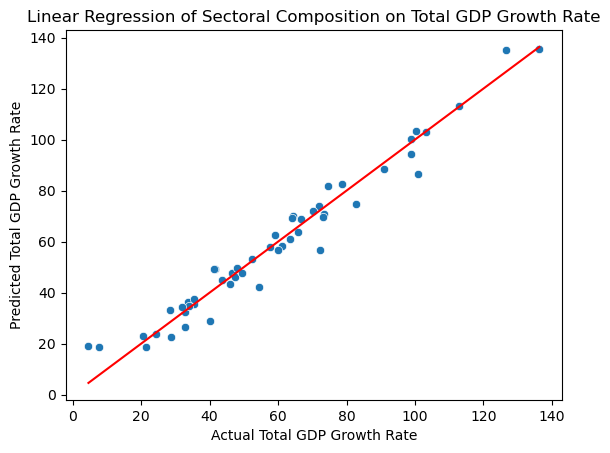

In [243]:
# Create a scatter plot of the actual vs. predicted values
sns.scatterplot(x=y, y=model.predict(sm.add_constant(X)))

# Add a regression line to the plot
sns.lineplot(x=y, y=y, color="red")

# Add labels and a title to the plot
plt.xlabel("Actual Total GDP Growth Rate")
plt.ylabel("Predicted Total GDP Growth Rate")
plt.title("Linear Regression of Sectoral Composition on Total GDP Growth Rate")

# Show the plot
plt.show()

In [244]:
import pandas as pd
import statsmodels.api as sm

# Define the predictor variables (20 sectors) and the response variable (total GDP growth)
X = data.iloc[:, 1:-1]
y = data.iloc[:, -1]

# Fit a linear regression model using statsmodels
model = sm.OLS(y, sm.add_constant(X)).fit()

# Extract the estimated coefficients for each sector
coefs = model.params[1:-1]

# Sort the coefficients in descending order
sorted_coefs = coefs.sort_values(ascending=False)

# Print the top 5 sectors associated with high levels of growth in the total GDP
print("Top 5 sectors:")
print(sorted_coefs.head())

# Print the bottom 5 sectors associated with low levels of growth in the total GDP
print("\nBottom 5 sectors:")
print(sorted_coefs.tail())

Top 5 sectors:
Government and government enterprises               0.249912
Retail trade                                        0.175138
Professional, scientific, and technical services    0.165118
Manufacturing                                       0.116483
Construction                                        0.075396
dtype: float64

Bottom 5 sectors:
Management of companies and enterprises                                     0.014155
Administrative and support and waste management and remediation services   -0.048554
Educational services                                                       -0.050177
Health care and social assistance                                          -0.067462
Other services (except government and government enterprises)              -0.156728
dtype: float64


In [245]:
X = data.iloc[:, 1:-1]
y = data.iloc[:, -1]

# Fit a linear regression model using statsmodels
model = sm.OLS(y, sm.add_constant(X)).fit()

# Extract the p-values for each sector
p_values = model.pvalues[1:-1]

# Sort the p-values in ascending order
sorted_p_values = p_values.sort_values()

# Print the p-values for each sector
print("P-values:")
print(sorted_p_values)

P-values:
Professional, scientific, and technical services                            0.000011
Manufacturing                                                               0.000014
Retail trade                                                                0.001805
Mining, quarrying, and oil and gas extraction                               0.006828
Agriculture, forestry, fishing and hunting                                  0.037585
Information                                                                 0.091472
Government and government enterprises                                       0.113598
Educational services                                                        0.146091
Finance and insurance                                                       0.186405
Health care and social assistance                                           0.197493
Administrative and support and waste management and remediation services    0.205040
Management of companies and enterprises                

In [246]:
import pandas as pd
import statsmodels.api as sm

# Define the predictor variables (3 statistically significant sectors) and any other relevant variables
X = data[["Professional, scientific, and technical services", "Manufacturing", "Retail trade"]]
y = data["TOTAL_GDP_GROWTH"]

# Fit a linear regression model using statsmodels
model = sm.OLS(y, sm.add_constant(X)).fit()

# Print the regression results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:       TOTAL_GDP_GROWTH   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     83.65
Date:                Fri, 17 Feb 2023   Prob (F-statistic):           7.26e-19
Time:                        15:30:23   Log-Likelihood:                -197.23
No. Observations:                  51   AIC:                             402.5
Df Residuals:                      47   BIC:                             410.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                                       coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------

In [247]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate the VIF for each predictor variable
vif = pd.DataFrame()
vif["features"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Print the VIF values
print(vif)

                                           features       VIF
0  Professional, scientific, and technical services  5.482568
1                                     Manufacturing  2.271714
2                                      Retail trade  5.257880


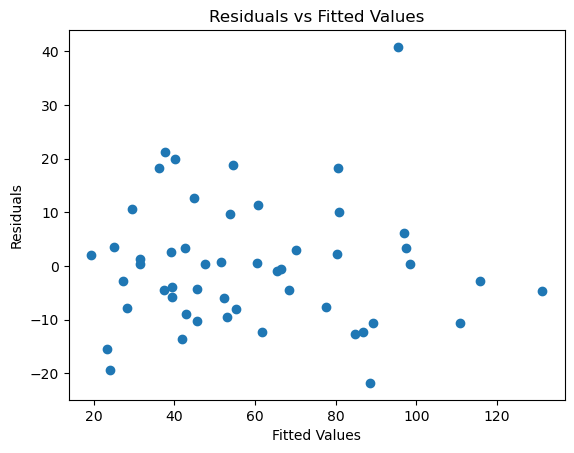

Breusch-Pagan test:
LM statistic:  11.575849124530796
LM p-value:  0.003064335418622776
F statistic:  4.697972737004153
F p-value:  0.0059010074237038955


In [248]:
# Calculate the residuals from the regression model
residuals = model.resid

# Plot the residuals against the fitted values
plt.scatter(model.fittedvalues, residuals)
plt.title("Residuals vs Fitted Values")
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.show()

# Perform the Breusch-Pagan test for heteroscedasticity
from statsmodels.stats.diagnostic import het_breuschpagan

lm, lm_pvalue, fvalue, f_pvalue = het_breuschpagan(residuals, X)
print("Breusch-Pagan test:")
print("LM statistic: ", lm)
print("LM p-value: ", lm_pvalue)
print("F statistic: ", fvalue)
print("F p-value: ", f_pvalue)

In [249]:
# Define the predictor variables (3 statistically significant sectors) and any other relevant variables
X = data[["Professional, scientific, and technical services", "Manufacturing", "Retail trade"]]
y = data["TOTAL_GDP_GROWTH"]

# Fit a linear regression model using statsmodels
model = sm.OLS(y, sm.add_constant(X)).fit()

# Print the regression results
print(model.summary())

# Fit a simplified model that excludes the non-significant variables
simplified_model = sm.OLS(y, sm.add_constant(X[["Professional, scientific, and technical services", "Manufacturing", "Retail trade"]])).fit()

# Print the regression results for the simplified model
print(simplified_model.summary())

# Compare the performance of the full model and the simplified model using the R-squared and the adjusted R-squared
print("Full Model R-squared:", model.rsquared)
print("Full Model Adjusted R-squared:", model.rsquared_adj)
print("Simplified Model R-squared:", simplified_model.rsquared)
print("Simplified Model Adjusted R-squared:", simplified_model.rsquared_adj)


                            OLS Regression Results                            
Dep. Variable:       TOTAL_GDP_GROWTH   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     83.65
Date:                Fri, 17 Feb 2023   Prob (F-statistic):           7.26e-19
Time:                        15:30:25   Log-Likelihood:                -197.23
No. Observations:                  51   AIC:                             402.5
Df Residuals:                      47   BIC:                             410.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                                       coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------

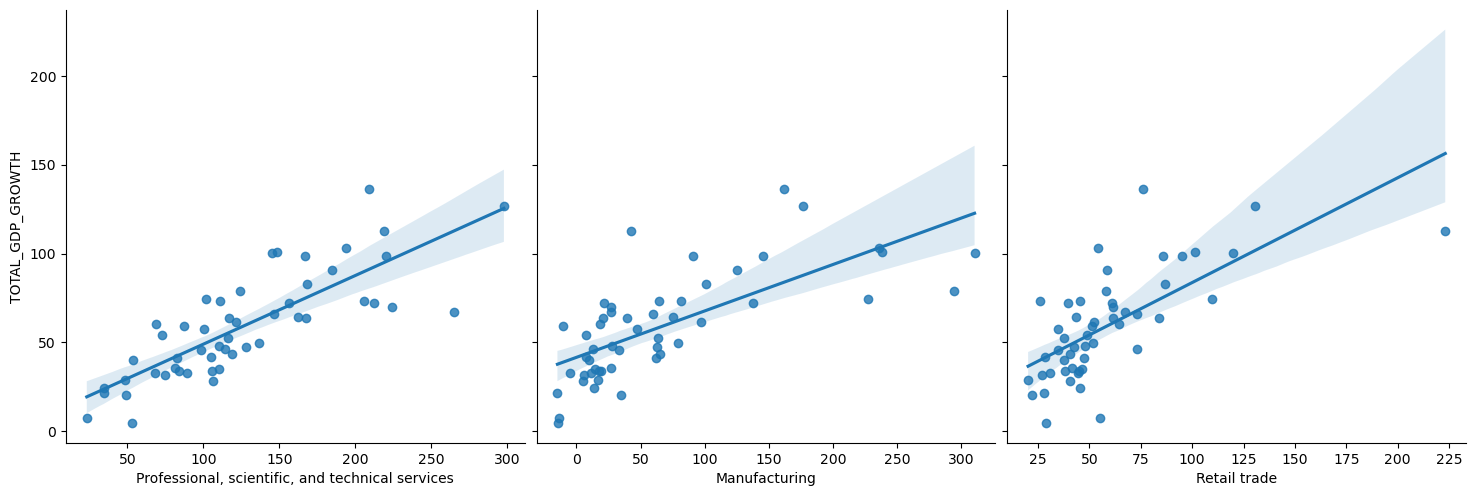

In [250]:
# Define the predictor variables (3 statistically significant sectors)
X = data[["Professional, scientific, and technical services", "Manufacturing", "Retail trade"]]
y = data["TOTAL_GDP_GROWTH"]

# Create a pairplot to visualize the correlations between the variables
sns.pairplot(data, x_vars=X.columns, y_vars="TOTAL_GDP_GROWTH", kind="reg", height=5)
plt.show()

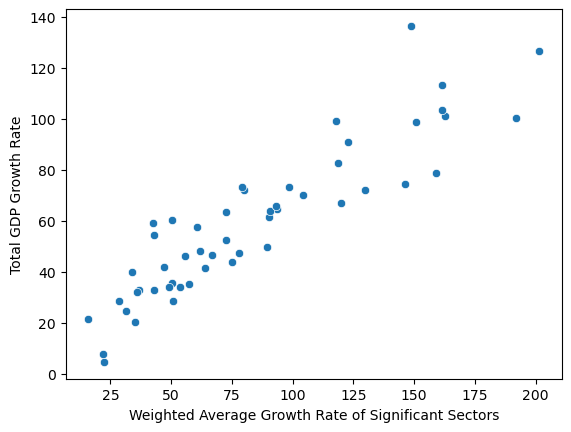

In [251]:
# Define the predictor variables (3 statistically significant sectors)
X = data[["Professional, scientific, and technical services", "Manufacturing", "Retail trade"]]
y = data["TOTAL_GDP_GROWTH"]

# Calculate the weighted average growth rate of the 3 significant sectors
weights = [1/3, 1/3, 1/3]
sector_growth = (X * weights).sum(axis=1)

# Create a scatterplot to visualize the relationship between the variables
sns.scatterplot(x=sector_growth, y=y)
plt.xlabel("Weighted Average Growth Rate of Significant Sectors")
plt.ylabel("Total GDP Growth Rate")
plt.show()

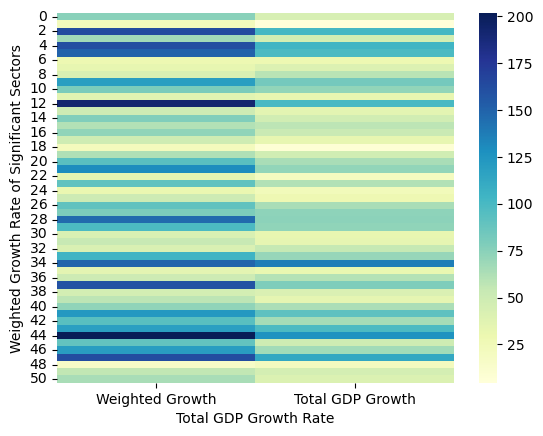

In [252]:
# Define the predictor variables (3 statistically significant sectors)
X = data[["Professional, scientific, and technical services", "Manufacturing", "Retail trade"]]
y = data["TOTAL_GDP_GROWTH"]

# Calculate the weighted average growth rate of the 3 significant sectors
weights = [1/3, 1/3, 1/3]
weighted_growth = (X * weights).sum(axis=1)

# Create a matrix with the two variables (weighted_growth and TOTAL_GDP_GROWTH)
matrix = pd.concat([weighted_growth, y], axis=1)
matrix.columns = ["Weighted Growth", "Total GDP Growth"]

# Create a heatmap to visualize the relationship between the two variables for all states
sns.heatmap(matrix, cmap="YlGnBu")
plt.xlabel("Total GDP Growth Rate")
plt.ylabel("Weighted Growth Rate of Significant Sectors")
plt.show()

States with the highest weighted growth:
            State  Weighted Growth
44           Utah       201.549656
12          Idaho       191.765949
2         Arizona       162.596941
47     Washington       161.567436
4      California       161.299702
37         Oregon       158.807178
5        Colorado       150.593376
34   North Dakota       148.812978
28         Nevada       146.197423
21  Massachusetts       129.816894

States with the highest total GDP growth:
           State  Total GDP Growth
34  North Dakota        136.352887
44          Utah        126.549305
47    Washington        112.995789
4     California        103.224966
2        Arizona        100.878876
12         Idaho        100.176017
43         Texas         98.875729
5       Colorado         98.715246
41  South Dakota         90.909894
9        Florida         82.677534


/tmp/ipykernel_7806/2547975796.py:32: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  common_matrix = matrix.loc[common_states]


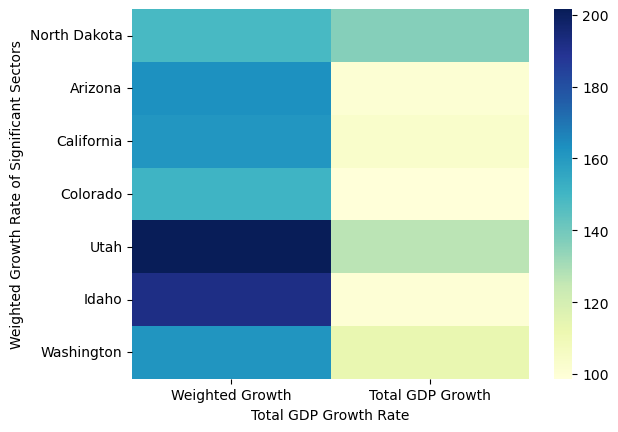

In [253]:


# Define the predictor variables (3 statistically significant sectors)
X = data[["Professional, scientific, and technical services", "Manufacturing", "Retail trade"]]
y = data["TOTAL_GDP_GROWTH"]

# Calculate the weighted average growth rate of the 3 significant sectors
weights = [1/3, 1/3, 1/3]
weighted_growth = (X * weights).sum(axis=1)

# Create a matrix of the two variables (weighted_growth and TOTAL_GDP_GROWTH) for each state
matrix = pd.concat([weighted_growth, y], axis=1)
matrix.columns = ["Weighted Growth", "Total GDP Growth"]
state_names = data["STATE"].tolist()

# Get the 10 states with the highest weighted growth
top_weighted = matrix.nlargest(10, "Weighted Growth")
top_weighted["State"] = top_weighted.index.map(dict(zip(range(len(state_names)), state_names)))

print("States with the highest weighted growth:")
print(top_weighted[["State", "Weighted Growth"]])

# Get the 10 states with the highest total GDP growth
top_total = matrix.nlargest(10, "Total GDP Growth")
top_total["State"] = top_total.index.map(dict(zip(range(len(state_names)), state_names)))

print("\nStates with the highest total GDP growth:")
print(top_total[["State", "Total GDP Growth"]])

# Get the states that appear in both lists
common_states = set(top_weighted.index).intersection(set(top_total.index))

# Create a new matrix for the common states
common_matrix = matrix.loc[common_states]
common_matrix["State"] = common_matrix.index.map(dict(zip(range(len(state_names)), state_names)))

# Create a heatmap to visualize the relationship between the two variables for the common states
sns.heatmap(common_matrix.set_index("State"), cmap="YlGnBu")
plt.xlabel("Total GDP Growth Rate")
plt.ylabel("Weighted Growth Rate of Significant Sectors")
plt.show()


In [254]:
new_data = data
data = pd.read_csv("/home/pintz/dev/analytics/gdp-by-state/data/processed/data.csv")

In [255]:
data

,STATE,SECTOR,1997,1998,1999,2000,2001,2002,2003,2004,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Alabama,"Agriculture, forestry, fishing and hunting",2.176800e+09,2.411300e+09,2.730500e+09,2.685600e+09,2.933300e+09,2.528700e+09,3.127700e+09,3.638300e+09,...,1.788800e+09,2.986400e+09,2.590700e+09,3.185300e+09,2.781600e+09,3.050100e+09,3.185100e+09,2.666700e+09,2.190300e+09,2.871000e+09
1,Alabama,"Mining, quarrying, and oil and gas extraction",3.492800e+09,3.959800e+09,3.606800e+09,3.248800e+09,3.581500e+09,3.294900e+09,3.422400e+09,3.520500e+09,...,2.906400e+09,2.774400e+09,2.408800e+09,2.309200e+09,2.229900e+09,2.920600e+09,2.739700e+09,2.500600e+09,2.373500e+09,2.196800e+09
2,Alabama,Utilities,4.150900e+09,4.024400e+09,4.709200e+09,4.834600e+09,4.232500e+09,4.309300e+09,4.299100e+09,4.551000e+09,...,5.711800e+09,5.524600e+09,5.254600e+09,5.337800e+09,5.771500e+09,5.555300e+09,5.439700e+09,5.581600e+09,5.668400e+09,5.321000e+09
3,Alabama,Construction,9.379400e+09,1.004760e+10,1.022370e+10,1.024180e+10,9.775800e+09,9.336200e+09,9.279200e+09,9.136000e+09,...,6.897600e+09,6.649300e+09,6.363200e+09,6.335000e+09,6.643800e+09,6.827800e+09,7.078700e+09,7.506000e+09,7.520500e+09,7.730300e+09
4,Alabama,Manufacturing,2.182400e+10,2.248370e+10,2.354690e+10,2.406180e+10,2.352440e+10,2.376890e+10,2.470240e+10,2.994730e+10,...,3.205870e+10,3.381410e+10,3.276980e+10,3.220950e+10,3.346970e+10,3.428260e+10,3.530480e+10,3.541420e+10,3.395390e+10,3.606240e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1015,Wyoming,Health care and social assistance,8.421000e+08,8.562000e+08,9.087000e+08,9.682000e+08,9.895000e+08,1.050000e+09,1.105900e+09,1.164700e+09,...,1.561600e+09,1.554900e+09,1.553700e+09,1.579900e+09,1.573400e+09,1.566400e+09,1.594400e+09,1.611800e+09,1.619000e+09,1.616200e+09
1016,Wyoming,"Arts, entertainment, and recreation",1.928000e+08,1.902000e+08,2.115000e+08,2.346000e+08,1.962000e+08,1.681000e+08,1.752000e+08,1.766000e+08,...,2.613000e+08,2.481000e+08,2.725000e+08,2.469000e+08,2.385000e+08,2.506000e+08,2.574000e+08,2.454000e+08,2.073000e+08,2.451000e+08
1017,Wyoming,Accommodation and food services,7.158000e+08,7.160000e+08,7.769000e+08,8.246000e+08,7.731000e+08,8.734000e+08,9.105000e+08,9.892000e+08,...,1.140700e+09,1.147500e+09,1.142600e+09,1.208700e+09,1.149500e+09,1.165400e+09,1.088400e+09,1.116400e+09,1.019000e+09,1.228100e+09
1018,Wyoming,Other services (except government and governme...,6.585000e+08,6.747000e+08,6.903000e+08,7.182000e+08,6.000000e+08,6.413000e+08,5.950000e+08,5.756000e+08,...,6.439000e+08,6.119000e+08,5.770000e+08,5.620000e+08,5.141000e+08,5.072000e+08,5.281000e+08,5.325000e+08,5.003000e+08,5.106000e+08


In [257]:
df = data

# melt the DataFrame to transform it to long format
df_melted = pd.melt(df, id_vars=['STATE', 'SECTOR'], var_name='YEAR', value_name='GDP')

# select the rows for the three sectors of interest
df_sectors = df_melted[df_melted['SECTOR'].isin(['Professional, scientific, and technical services', 'Manufacturing', 'Retail trade'])]

# group by state and year to get the total GDP for each state and year
df_totals = df_sectors.groupby(['STATE', 'YEAR'])['GDP'].sum().reset_index()

# pivot the DataFrame to transform it to wide format
df_pivoted = df_totals.pivot(index='STATE', columns='YEAR', values='GDP')

# select the columns you want to keep and save to a new file
df_final = df_pivoted[['1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', 
                       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', 
                       '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021']]


In [260]:
df_final.columns

Index(['1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2018', '2019', '2020', '2021'],
      dtype='object', name='YEAR')

In [264]:
df = data

# melt the DataFrame to transform it to long format
df_melted = pd.melt(df, id_vars=['STATE', 'SECTOR'], var_name='YEAR', value_name='GDP')

# select the rows for the three sectors of interest
df_sectors = df_melted[df_melted['SECTOR'].isin(['Accommodation and food services', 
                                                 'Administrative and support and waste management and remediation services',
                                                 'Agriculture, forestry, fishing and hunting',
                                                 'Arts, entertainment, and recreation',
                                                 'Construction',
                                                 'Educational services',
                                                 'Finance and insurance',
                                                 'Government and government enterprises',
                                                 'Health care and social assistance',
                                                 'Information',
                                                 'Management of companies and enterprises',
                                                 'Manufacturing',
                                                 'Mining, quarrying, and oil and gas extraction',
                                                 'Other services (except government and government enterprises)',
                                                 'Professional, scientific, and technical services',
                                                 'Real estate and rental and leasing',
                                                 'Retail trade',
                                                 'Transportation and warehousing',
                                                 'Utilities',
                                                 'Wholesale trade'])]

# group by state and year to get the total GDP for each state and year
df_totals = df_sectors.groupby(['STATE', 'YEAR'])['GDP'].sum().reset_index()

# pivot the DataFrame to transform it to wide format
df_pivoted = df_totals.pivot(index='STATE', columns='YEAR', values='GDP')

# select the columns you want to keep and save to a new file
df_final2 = df_pivoted[['1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', 
                       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', 
                       '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021']]


In [265]:
df_final2

YEAR,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
STATE,,,,,,,,,,,,,,,,,,,,,
Alabama,1.465165e+11,1.518357e+11,1.566207e+11,1.585994e+11,1.580059e+11,1.611105e+11,1.660275e+11,1.770118e+11,1.845913e+11,1.873732e+11,...,1.892456e+11,1.913881e+11,1.898315e+11,1.913674e+11,1.943020e+11,1.975425e+11,2.010128e+11,2.039386e+11,2.002379e+11,2.104650e+11
Alaska,4.751280e+10,4.410210e+10,4.255640e+10,4.042320e+10,4.179370e+10,4.476660e+10,4.319510e+10,4.510940e+10,4.656310e+10,4.984240e+10,...,5.828350e+10,5.539320e+10,5.423780e+10,5.470260e+10,5.393820e+10,5.430160e+10,5.277950e+10,5.306880e+10,5.073840e+10,4.969640e+10
Arizona,1.739153e+11,1.867745e+11,2.001967e+11,2.097213e+11,2.131194e+11,2.198601e+11,2.315038e+11,2.433647e+11,2.621782e+11,2.744071e+11,...,2.714402e+11,2.734667e+11,2.771053e+11,2.825610e+11,2.914191e+11,3.041559e+11,3.153687e+11,3.262921e+11,3.279858e+11,3.493591e+11
Arkansas,8.383300e+10,8.588070e+10,9.028850e+10,9.118570e+10,9.116240e+10,9.402670e+10,9.800000e+10,1.028723e+11,1.067981e+11,1.092940e+11,...,1.084921e+11,1.107637e+11,1.117615e+11,1.122981e+11,1.124539e+11,1.135537e+11,1.154047e+11,1.161989e+11,1.164840e+11,1.227804e+11
California,1.430868e+12,1.512728e+12,1.603453e+12,1.717075e+12,1.713059e+12,1.743927e+12,1.806452e+12,1.864569e+12,1.936892e+12,2.008943e+12,...,2.113097e+12,2.179749e+12,2.257477e+12,2.361220e+12,2.434482e+12,2.548254e+12,2.657324e+12,2.745142e+12,2.695461e+12,2.907881e+12
Colorado,1.875923e+11,2.032220e+11,2.164681e+11,2.316013e+11,2.355907e+11,2.361844e+11,2.388989e+11,2.420820e+11,2.528890e+11,2.582546e+11,...,2.768231e+11,2.862438e+11,2.986729e+11,3.127740e+11,3.190694e+11,3.303499e+11,3.435307e+11,3.606858e+11,3.556114e+11,3.727745e+11
Connecticut,1.929656e+11,1.984729e+11,2.043674e+11,2.183166e+11,2.198609e+11,2.180212e+11,2.206185e+11,2.343682e+11,2.392116e+11,2.489966e+11,...,2.409120e+11,2.361157e+11,2.358928e+11,2.427658e+11,2.433530e+11,2.468501e+11,2.495313e+11,2.524936e+11,2.366249e+11,2.482187e+11
Delaware,4.641560e+10,5.059670e+10,5.419110e+10,5.643260e+10,5.812370e+10,5.642030e+10,5.724820e+10,6.004320e+10,5.928700e+10,6.050040e+10,...,6.235460e+10,6.024910e+10,6.479920e+10,6.660110e+10,6.300260e+10,6.072230e+10,6.215030e+10,6.472460e+10,6.279740e+10,6.499060e+10
District of Columbia,8.047800e+10,8.194210e+10,8.526320e+10,8.608370e+10,8.906890e+10,9.163090e+10,9.329400e+10,9.767240e+10,9.951130e+10,9.982910e+10,...,1.121571e+11,1.123370e+11,1.145522e+11,1.168247e+11,1.197135e+11,1.209130e+11,1.239420e+11,1.249187e+11,1.233414e+11,1.280420e+11


In [266]:
df_final

YEAR,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
STATE,,,,,,,,,,,,,,,,,,,,,
Alabama,3.885550e+10,4.114510e+10,4.266960e+10,4.315850e+10,4.262620e+10,4.397690e+10,4.627740e+10,5.219640e+10,5.433880e+10,5.636500e+10,...,5.574180e+10,5.764260e+10,5.662310e+10,5.657550e+10,5.887490e+10,6.063890e+10,6.258000e+10,6.353520e+10,6.214520e+10,6.525170e+10
Alaska,4.687500e+09,5.274000e+09,4.760600e+09,4.505600e+09,4.920900e+09,5.170700e+09,5.459900e+09,5.524200e+09,5.391300e+09,5.431500e+09,...,5.139400e+09,5.514600e+09,5.801100e+09,6.086400e+09,5.757000e+09,5.889300e+09,5.362000e+09,5.532500e+09,5.321400e+09,5.539000e+09
Arizona,3.216880e+10,3.588770e+10,3.955100e+10,4.197040e+10,4.364780e+10,4.548300e+10,5.088370e+10,5.052270e+10,5.328810e+10,5.857000e+10,...,6.015110e+10,5.774230e+10,6.080600e+10,6.297520e+10,6.524280e+10,6.921680e+10,7.372480e+10,7.697840e+10,7.742670e+10,8.356730e+10
Arkansas,2.408880e+10,2.428900e+10,2.583690e+10,2.550890e+10,2.495890e+10,2.675520e+10,2.804550e+10,2.976180e+10,3.049610e+10,3.135170e+10,...,2.649170e+10,2.801380e+10,2.884180e+10,2.875270e+10,2.924140e+10,2.949670e+10,3.075270e+10,3.108260e+10,3.083020e+10,3.263960e+10
California,3.116257e+11,3.412596e+11,3.803090e+11,4.390970e+11,4.265419e+11,4.216954e+11,4.508006e+11,4.702123e+11,5.019855e+11,5.284205e+11,...,5.604991e+11,5.745479e+11,6.027120e+11,6.331171e+11,6.479461e+11,6.902198e+11,7.367405e+11,7.696383e+11,7.701042e+11,8.335146e+11
Colorado,3.484770e+10,3.792650e+10,4.031960e+10,4.420840e+10,4.500100e+10,4.577790e+10,4.684550e+10,4.965370e+10,5.226030e+10,5.501650e+10,...,6.150030e+10,6.327600e+10,6.595930e+10,6.823550e+10,7.019920e+10,7.229250e+10,7.655260e+10,8.139490e+10,8.176810e+10,8.912580e+10
Connecticut,4.997850e+10,5.111150e+10,5.299900e+10,5.539390e+10,5.681790e+10,5.976990e+10,6.087440e+10,6.654820e+10,6.670750e+10,7.276240e+10,...,5.752000e+10,5.809610e+10,5.778310e+10,5.798720e+10,5.611970e+10,5.778290e+10,6.135670e+10,6.322980e+10,5.853270e+10,6.280100e+10
Delaware,9.649700e+09,1.025970e+10,1.081460e+10,1.085980e+10,1.072060e+10,9.918400e+09,1.041320e+10,1.226830e+10,1.208900e+10,1.225080e+10,...,1.099870e+10,1.114510e+10,1.138570e+10,1.229590e+10,1.069430e+10,1.156140e+10,1.186870e+10,1.257400e+10,1.203490e+10,1.244610e+10
District of Columbia,1.552220e+10,1.673620e+10,1.758460e+10,1.805550e+10,1.913760e+10,1.994980e+10,2.081710e+10,2.232480e+10,2.214510e+10,2.283320e+10,...,2.527330e+10,2.477980e+10,2.539420e+10,2.616050e+10,2.743240e+10,2.726160e+10,2.771760e+10,2.741750e+10,2.712170e+10,2.841400e+10


In [ ]:
states_all_sectors = 